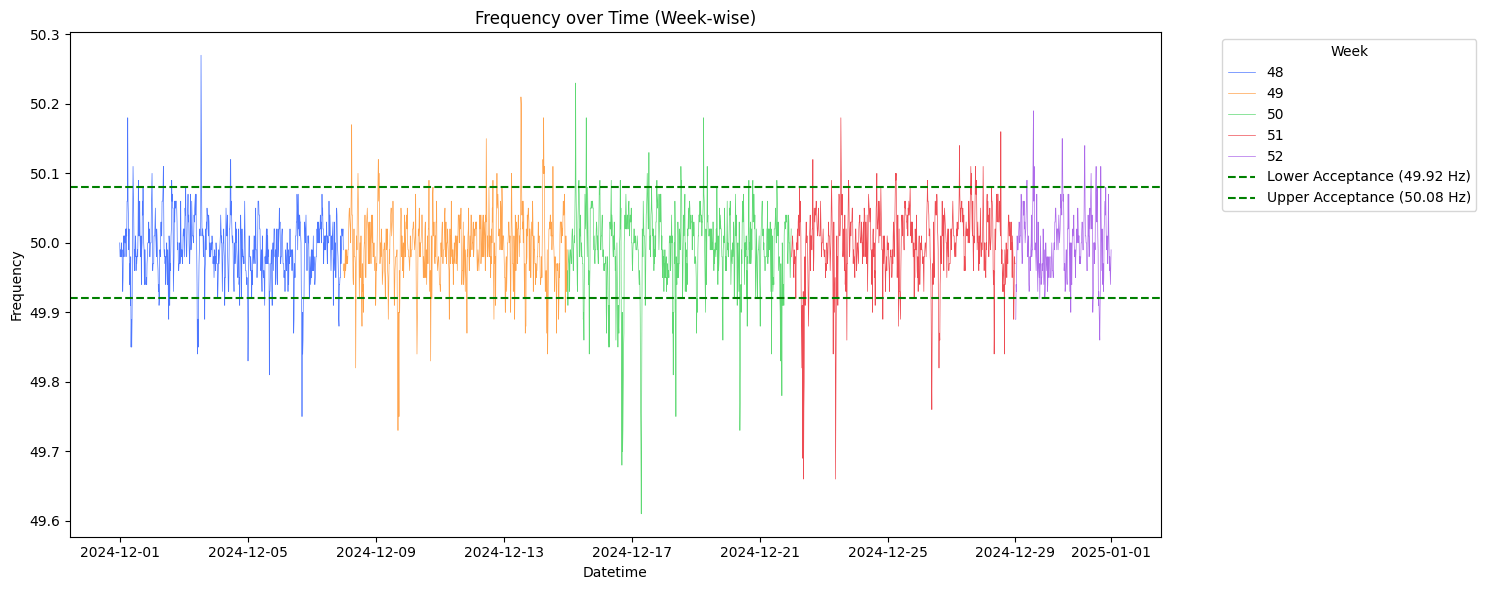

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/Frequency_final.csv"
df = pd.read_csv(file_path)

# Convert Date and Time to a single datetime column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d-%m-%Y %H:%M")
df["Week"] = df["Datetime"].dt.strftime('%U')  # Extract week name

# Set color palette for months
week = df["Week"].unique()
palette = sns.color_palette("bright", n_colors=len(week))
week_colors = dict(zip(week, palette))

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x="Datetime", y="frequency", hue="Week", palette=week_colors, linewidth=0.5, alpha=0.7)
plt.axhline(y=49.92, color='green', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')


plt.xlabel("Datetime")
plt.ylabel("Frequency")
plt.title("Frequency over Time (Week-wise)")
plt.legend(title="Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


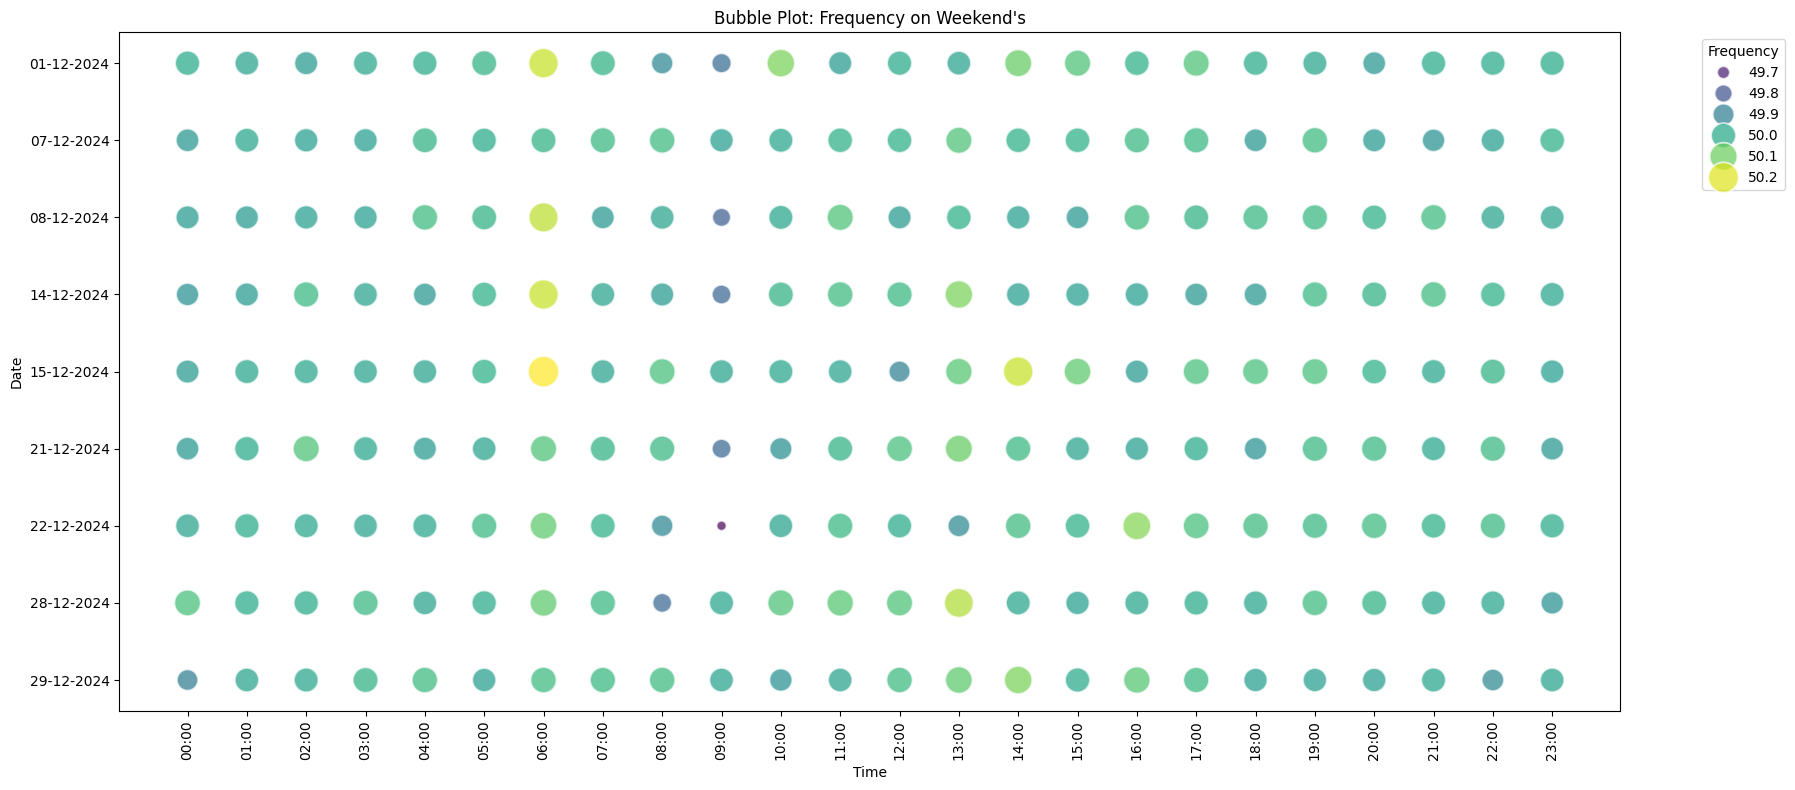

In [2]:
df = pd.read_csv('/content/Frequency_final.csv')
selected = df.loc[((df['Date'] == '01-12-2024') | (df['Date'] == '08-12-2024')|
            (df['Date'] == '15-12-2024')| (df['Date'] == '22-12-2024')| (df['Date'] == '29-12-2024') |
             (df['Date'] == '07-12-2024') | (df['Date'] == '14-12-2024') | (df['Date'] == '21-12-2024') | (df['Date'] == '28-12-2024'))
            & ((df['Time'] == '00:00') | (df['Time'] == '01:00') | (df['Time'] == '02:00') | (df['Time'] == '03:00') | (df['Time'] == '04:00') |
              (df['Time'] == '05:00') |(df['Time'] == '06:00') | (df['Time'] == '07:00') | (df['Time'] == '08:00') | (df['Time'] == '09:00')|
               (df['Time'] == '10:00') | (df['Time'] == '11:00') | (df['Time'] == '12:00') | (df['Time'] == '13:00') | (df['Time'] == '14:00') |
               (df['Time'] == '15:00') | (df['Time'] == '16:00') | (df['Time'] == '17:00') | (df['Time'] == '18:00') | (df['Time'] == '19:00') |
               (df['Time'] == '20:00') | (df['Time'] == '21:00') | (df['Time'] == '22:00') | (df['Time'] == '23:00') )]
selected
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=selected,
    x="Time",  # Use numeric time in seconds
    y="Date",
    size="frequency",  # Bubble size represents frequency
    sizes=(50, 500),   # Adjust the range of bubble sizes
    alpha=0.7,         # Transparency of bubbles
    hue="frequency",   # Color represents frequency
    palette="viridis"  # Color palette
)
plt.xlabel("Time")
plt.ylabel("Date")
plt.title("Bubble Plot: Frequency on Weekend's")
plt.legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

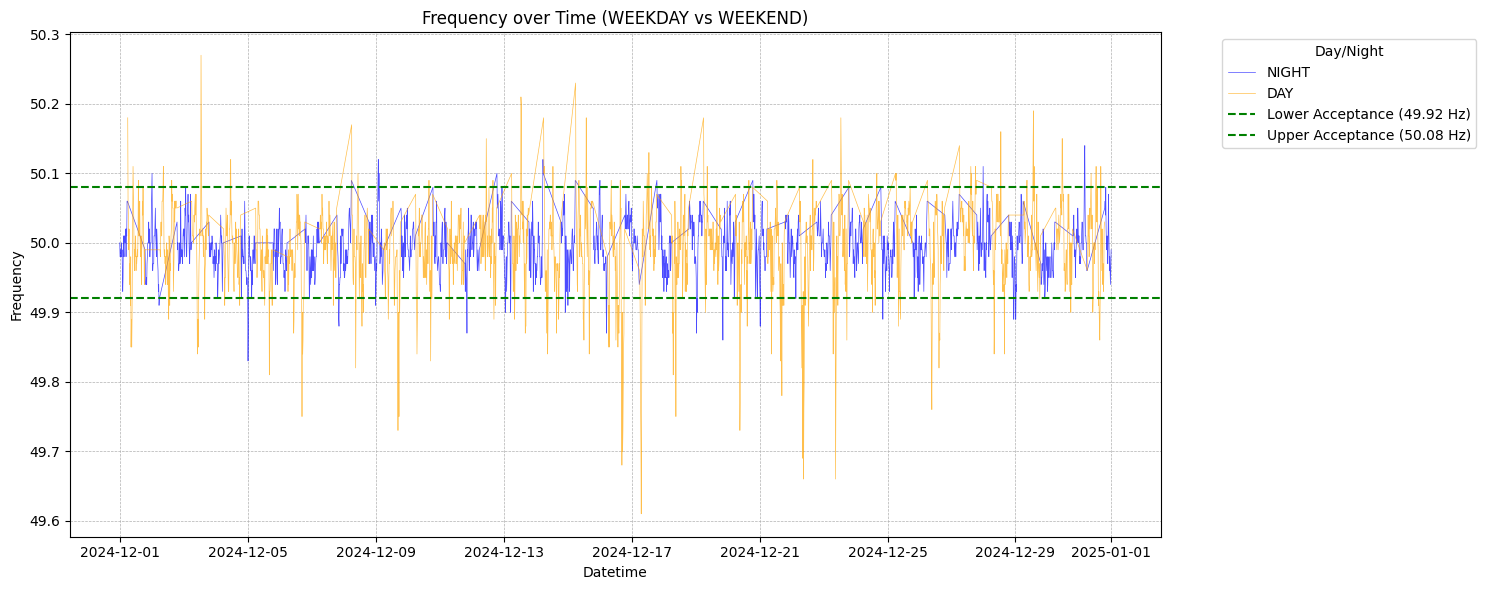

In [4]:
# Convert Date and Time to a single datetime column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d-%m-%Y %H:%M")

# Define a function to categorize time as DAY or NIGHT
def categorize_weekday_weekend(day):
    if 1 <= day <= 5:
        return "WEEKDAY"
    else:
        return "WEEKEND"

# Apply the function to create a new column
df["Day_Type"] = df["Datetime"].dt.dayofweek.apply(categorize_weekday_weekend)

# Set color palette for DAY and NIGHT
day_night_colors = {"DAY": "orange", "NIGHT": "blue"}

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x="Datetime", y="frequency", hue="Day_Night", palette=day_night_colors, linewidth=0.5, alpha=0.7)
plt.axhline(y=49.92, color='green', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')

plt.xlabel("Datetime")
plt.ylabel("Frequency")
plt.title("Frequency over Time (WEEKDAY vs WEEKEND)")
plt.legend(title="Day/Night", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

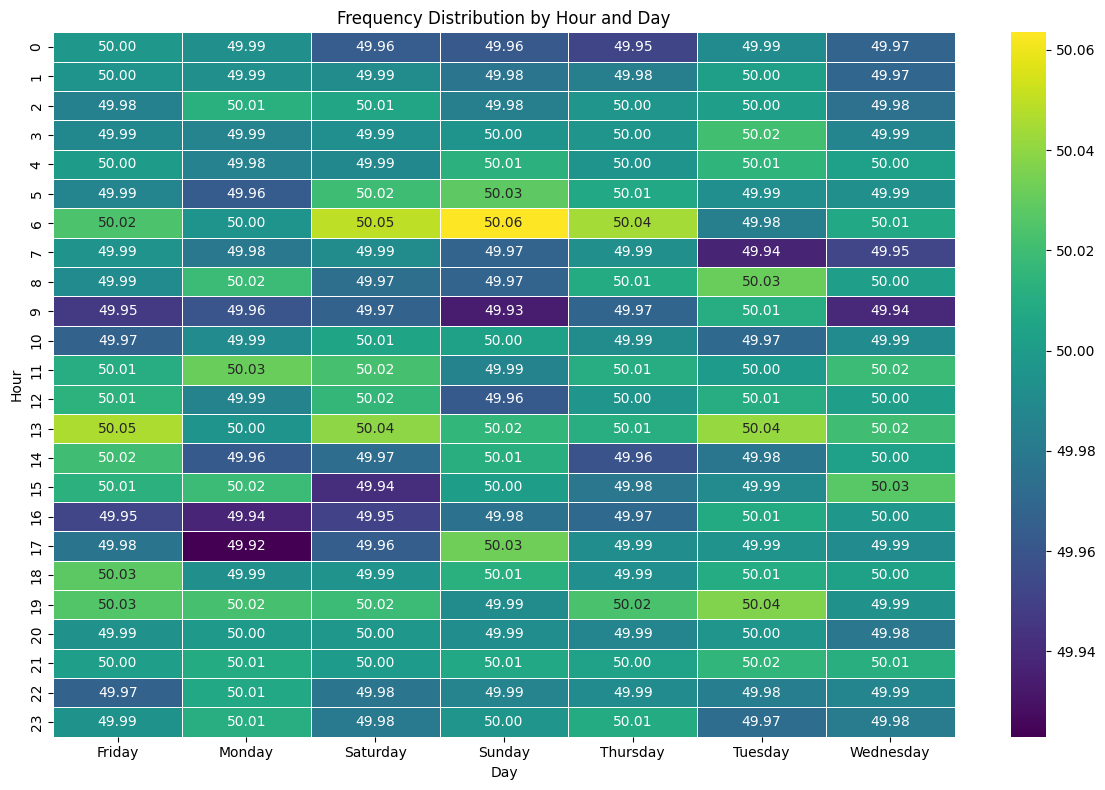

In [5]:
# Visualize how frequency varies across different hours of the day and days of the week
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d-%m-%Y %H:%M")
# Create a pivot table for heatmap
df["Hour"] = df["Datetime"].dt.hour
df["Day"] = df["Datetime"].dt.day_name()
heatmap_data = df.pivot_table(index="Hour", columns="Day", values="frequency", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Frequency Distribution by Hour and Day")
plt.xlabel("Day")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()

<ipython-input-6-b45c61f19df9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Day", y="frequency", palette="Set2")


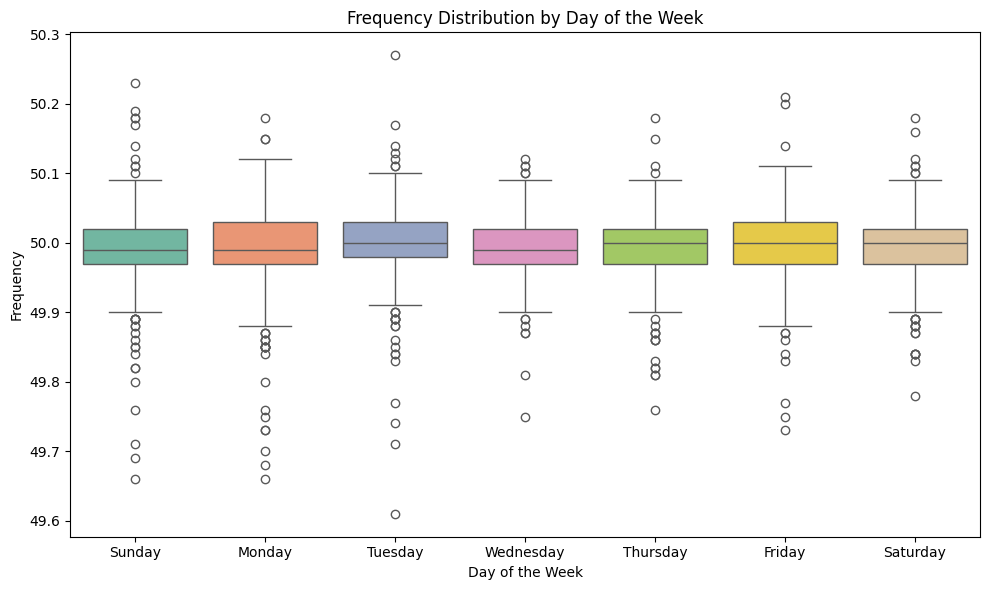

In [6]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d-%m-%Y %H:%M")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Day", y="frequency", palette="Set2")
plt.title("Frequency Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<ipython-input-7-32b7b81647a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Day_Type", y="frequency", palette="pastel")


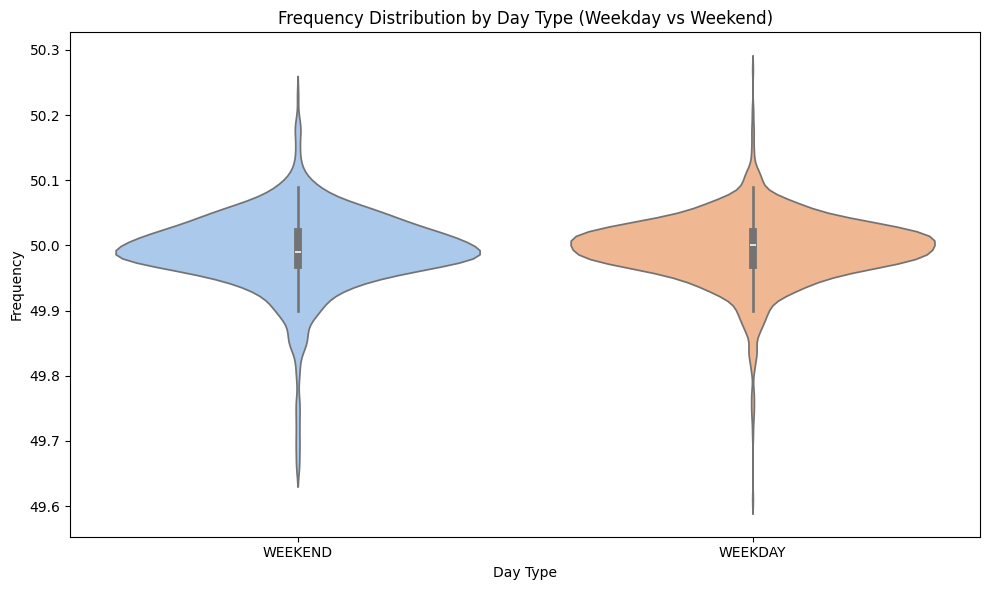

In [7]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d-%m-%Y %H:%M")
df["Day_Type"] = df["Datetime"].dt.dayofweek.apply(categorize_weekday_weekend)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Day_Type", y="frequency", palette="pastel")
plt.title("Frequency Distribution by Day Type (Weekday vs Weekend)")
plt.xlabel("Day Type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

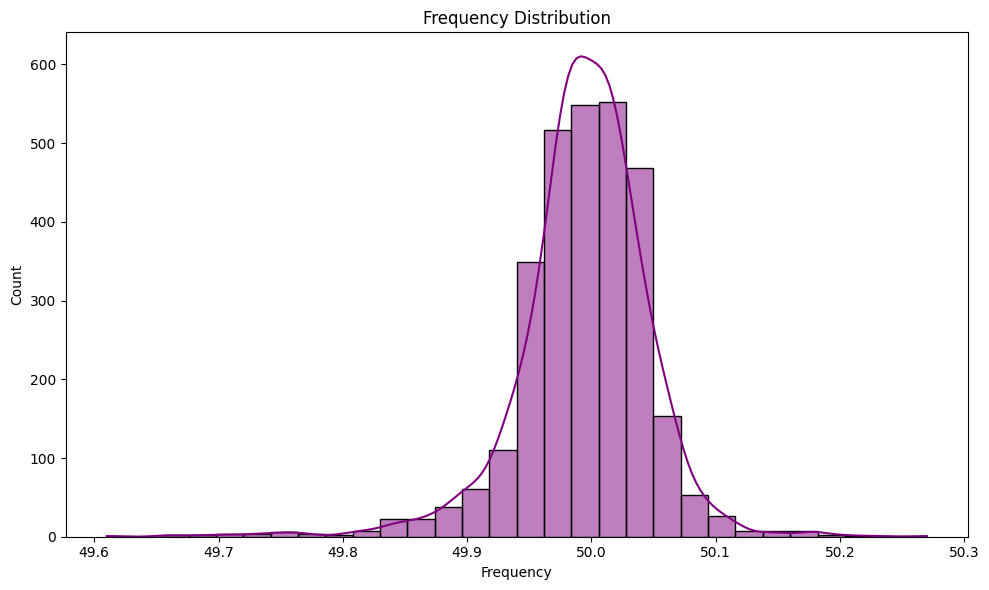

In [8]:
# Understand the overall distribution of frequency values
plt.figure(figsize=(10, 6))
sns.histplot(df["frequency"], bins=30, kde=True, color="purple")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

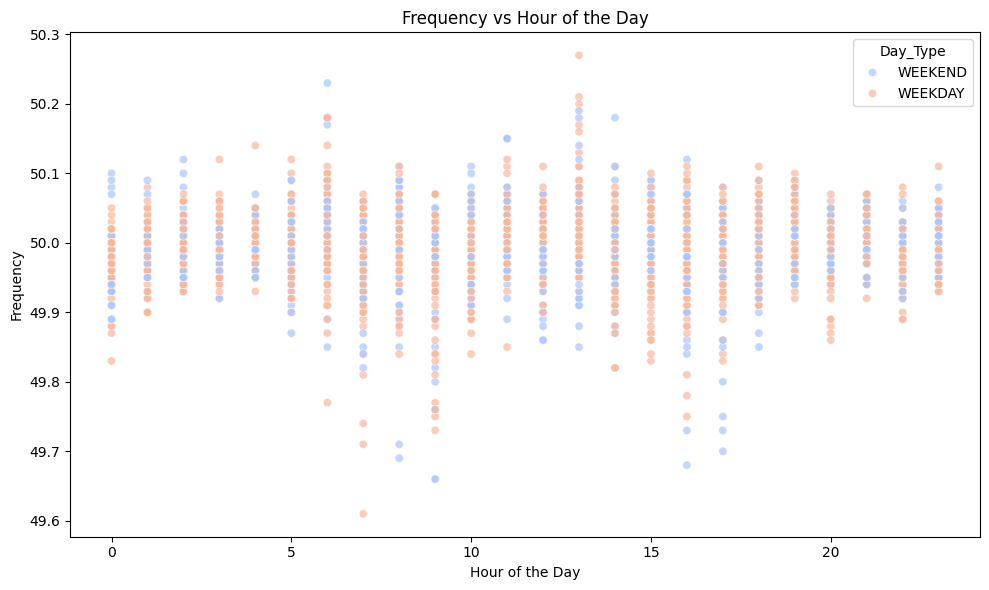

In [9]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d-%m-%Y %H:%M")
df["Day_Type"] = df["Datetime"].dt.dayofweek.apply(categorize_weekday_weekend)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Hour", y="frequency", hue="Day_Type", palette="coolwarm", alpha=0.7)
plt.title("Frequency vs Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

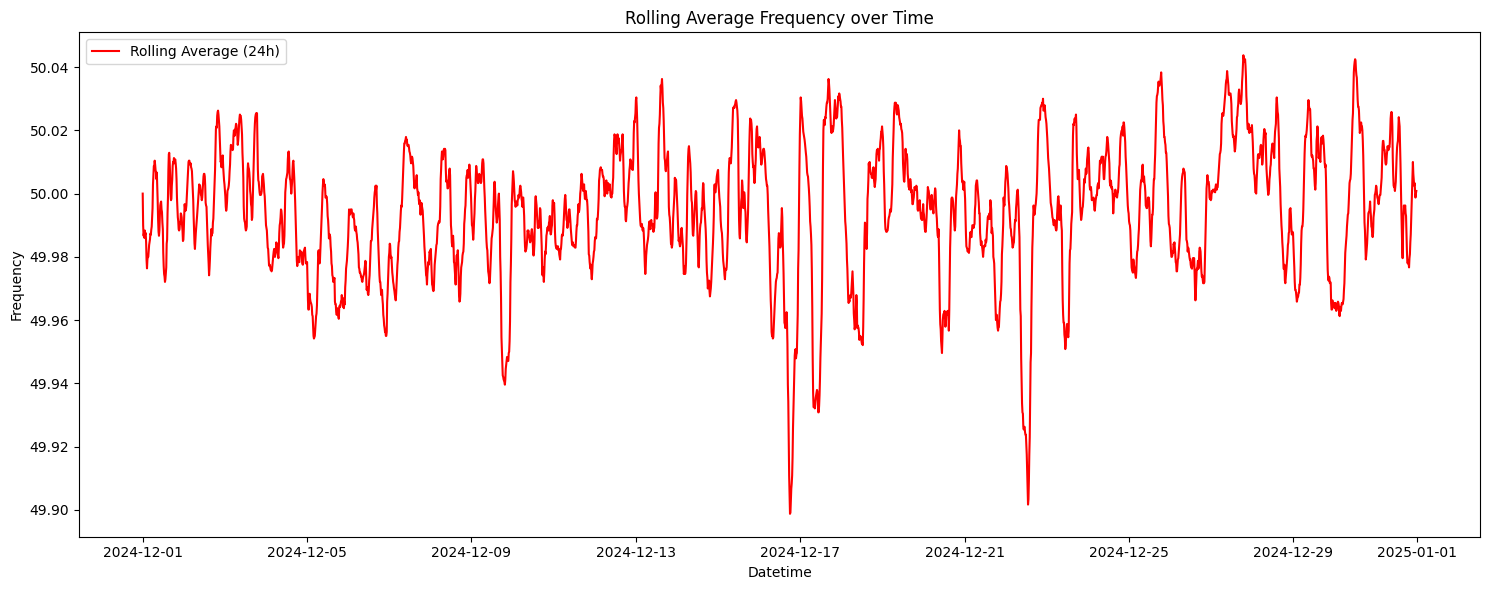

In [10]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d-%m-%Y %H:%M")
df["Day_Type"] = df["Datetime"].dt.dayofweek.apply(categorize_weekday_weekend)

df["Rolling_Avg"] = df["frequency"].rolling(window=24, min_periods=1).mean()  # 24-hour rolling average

plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x="Datetime", y="Rolling_Avg", color="red", label="Rolling Average (24h)")
plt.title("Rolling Average Frequency over Time")
plt.xlabel("Datetime")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

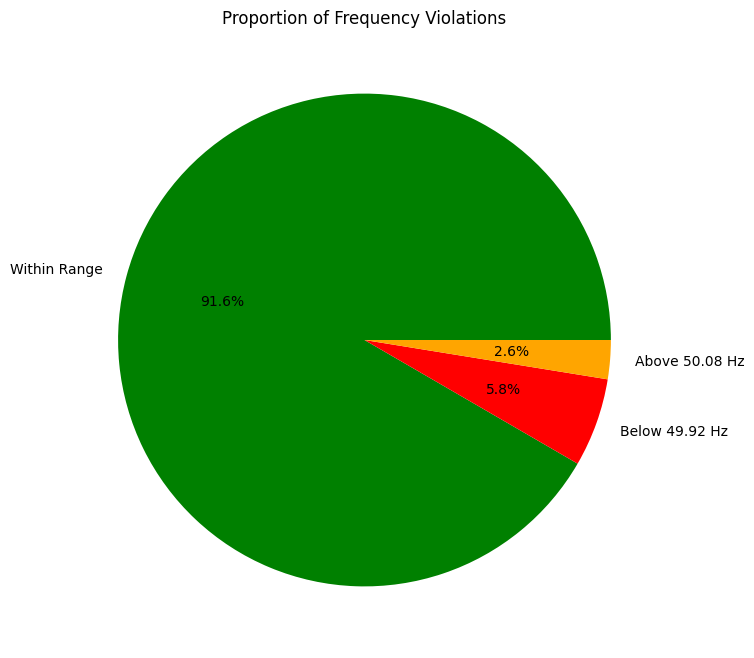

In [11]:
# Visualize the proportion of frequency values that fall outside the acceptable range (e.g., below 49.92 Hz or above 50.08 Hz)
df["Violation"] = df["frequency"].apply(lambda x: "Below 49.92 Hz" if x < 49.92 else ("Above 50.08 Hz" if x > 50.08 else "Within Range"))
violation_counts = df["Violation"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(violation_counts, labels=violation_counts.index, autopct="%1.1f%%", colors=["green", "red", "orange"])
plt.title("Proportion of Frequency Violations")
plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# First five observations
first_five = [50.0, 49.98, 49.98, 49.99, 49.98]

# Fit ARIMA model with p=1, d=0, q=0
model = ARIMA(first_five, order=(1, 0, 0))
model_fit = model.fit()

# Predict the 6th observation
prediction = model_fit.forecast(steps=1)
print(f"Predicted next three observations: {prediction}")


Predicted next three observations: [49.98863257]


In [39]:
df = pd.read_csv('/content/Frequency_final.csv')
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d-%m-%Y %H:%M")
frequency_data = df['frequency']

# Fit an ARIMA model (p=1, d=0, q=0) as an initial choice
model = ARIMA(frequency_data, order=(1, 0, 1))
model_fit = model.fit()

# Predict the next value (one step ahead)
prediction = model_fit.forecast(steps=30)
print(f"Predicted next frequency value: {prediction}")

Predicted next frequency value: 2976    49.990869
2977    49.991906
2978    49.992623
2979    49.993117
2980    49.993458
2981    49.993694
2982    49.993857
2983    49.993969
2984    49.994047
2985    49.994101
2986    49.994138
2987    49.994163
2988    49.994181
2989    49.994193
2990    49.994201
2991    49.994207
2992    49.994211
2993    49.994214
2994    49.994216
2995    49.994217
2996    49.994218
2997    49.994219
2998    49.994219
2999    49.994220
3000    49.994220
3001    49.994220
3002    49.994220
3003    49.994220
3004    49.994220
3005    49.994220
Name: predicted_mean, dtype: float64


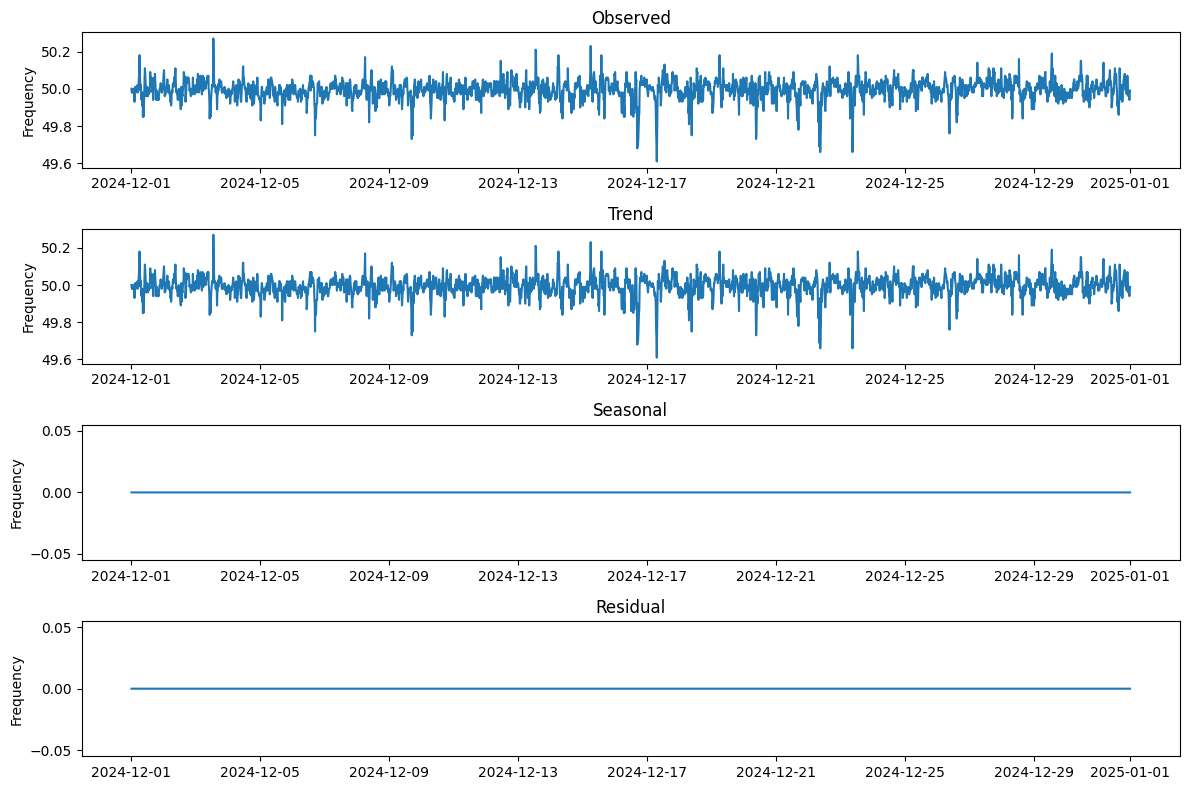

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('/content/Frequency_final.csv')

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M')

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Perform ETS decomposition
# Assuming the data has a daily frequency (you can adjust the `period` parameter if needed)
decomposition = seasonal_decompose(df['frequency'], model='additive', period=1)  # period=1 for no seasonality


# Plot the decomposition
plt.figure(figsize=(12, 8))

# Observed
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.ylabel('Frequency')

# Trend
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.ylabel('Frequency')

# Seasonal
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.ylabel('Frequency')

# Residual
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.5 MB/s eta 0:00:00


In [26]:
# Import necessary libraries
import pandas as pd
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('/content/Frequency_final.csv')

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M')

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Fit auto_arima function to the frequency dataset
stepwise_fit = auto_arima(
    df['frequency'],  # Time series data
    start_p=1,        # Starting value of p (AR order)
    start_q=1,        # Starting value of q (MA order)
    max_p=5,          # Maximum value of p
    max_q=5,          # Maximum value of q
    m=1,              # Seasonal period (set to 1 for no seasonality)
    start_P=0,        # Starting value of P (seasonal AR order)
    seasonal=False,   # No seasonality (set to True if seasonal)
    d=None,           # Let the model determine the differencing order
    D=None,           # Seasonal differencing order (set to 1 if seasonal=True)
    trace=True,       # Print status of the search
    error_action='ignore',  # Ignore invalid orders
    suppress_warnings=True,  # Suppress warnings
    stepwise=True     # Use stepwise algorithm for efficiency
)

# Print the summary of the fitted model
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-10370.709, Time=1.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31731.198, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10644.040, Time=4.89 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-10513.754, Time=2.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-10539.893, Time=1.45 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-10430.717, Time=0.84 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-10223.697, Time=8.81 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-10775.419, Time=1.53 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10779.009, Time=1.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10160.393, Time=0.96 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2976
Model:               SARIMAX(1, 0, 0)   Log Likelihood                5392.877
Date:                Wed, 12 Feb 2025   AIC                         -10779.754
Time:                        17:02:54   BIC                         -10761.759
Sample:                    12-01-2024   HQIC                        -10773.279
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.4023      0.472     34.718      0.000      15.476      17.328
ar.L1          0.6719      0.009     71.077      0.000       0.653       0.690
sigma2         0.0016   2.16e-05     72.436      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):              4594.99
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                               SARIMAX Results                                
Dep. Variable:              frequency   No. Observations:                 2880
Model:               SARIMAX(1, 0, 0)   Log Likelihood                4949.441
Date:                Wed, 12 Feb 2025   AIC                          -9894.881
Time:                        17:12:08   BIC                          -9882.950
Sample:                    12-01-2024   HQIC                         -9890.581
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.24e-06   3.08e+05      0.000       1.000       1.000
sigma2         0.0019   2.83e-05     66.132      0.000       0.002       0.002
Ljung-Box (L1) (Q):                 102.56   Jarque-

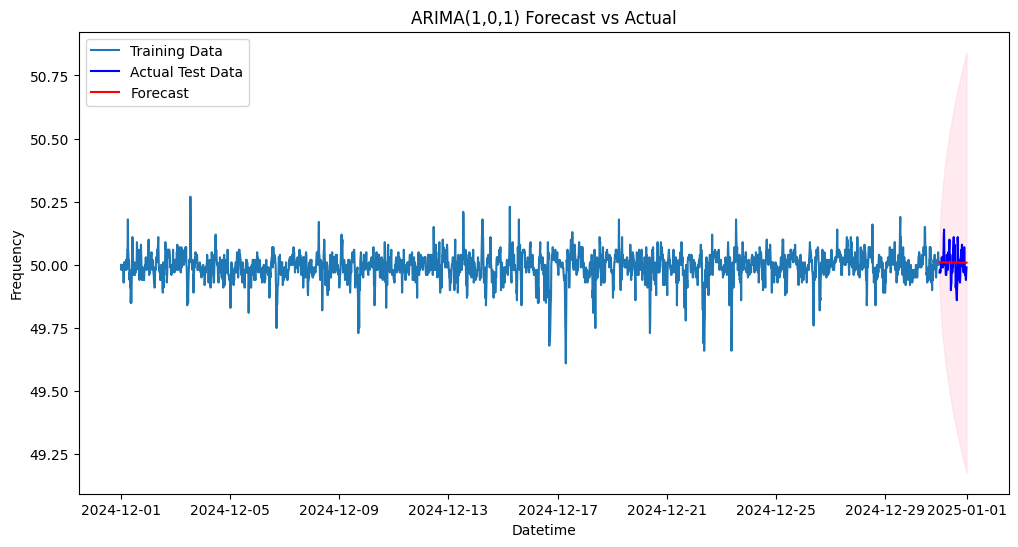

In [35]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Frequency_final.csv')

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M')

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Split data into train and test sets
# Use the last 12 data points for testing (adjust as needed)
train = df.iloc[:len(df)-96]
test = df.iloc[len(df)-96:]

# Fit the ARIMA(1,0,1) model using SARIMAX
# Since there is no seasonality, seasonal_order is set to (0,0,0,0)
model = SARIMAX(
    train['frequency'],  # Training data
    order=(1, 0, 0),     # ARIMA(p,d,q) order
    seasonal_order=(0, 0, 0, 0)  # No seasonality
)

# Fit the model
result = model.fit()

# Print the model summary
print(result.summary())

# Forecast on the test set
forecast = result.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['frequency'], label='Training Data')
plt.plot(test.index, test['frequency'], label='Actual Test Data', color='blue')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA(1,0,1) Forecast vs Actual')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.legend()
plt.show()

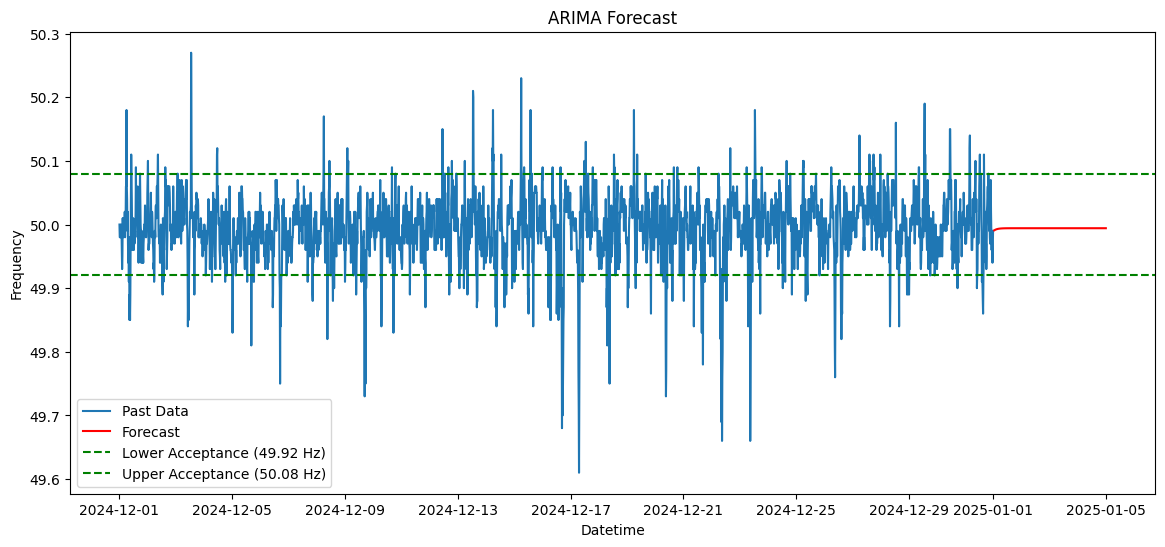

In [29]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Frequency_final.csv')

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M')

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Fit ARIMA model
model = ARIMA(df['frequency'], order=(1, 0, 1))
model_fit = model.fit()

# Generate forward forecast
forecast_steps = 96  # Number of steps into the future
# Use df instead of data for creating the forecast index:
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='H')[1:]
forecast = model_fit.forecast(steps=forecast_steps)

# Plot historical data and forecast
# Use df instead of data for plotting:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['frequency'], label='Past Data')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.axhline(y=49.92, color='green', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Get the predicted values for the test set
# Assuming 'forecast_mean' contains the predictions for the test set from your previous ARIMA model fitting
predicted_values = forecast_mean

# Calculate root mean squared error
rmse_value = rmse(test["frequency"], predicted_values)
print(f"RMSE: {rmse_value}")

# Calculate mean squared error
mse_value = mean_squared_error(test["frequency"], predicted_values)
print(f"MSE: {mse_value}")

RMSE: 0.04013282893566246
MSE: 0.001610643958379146


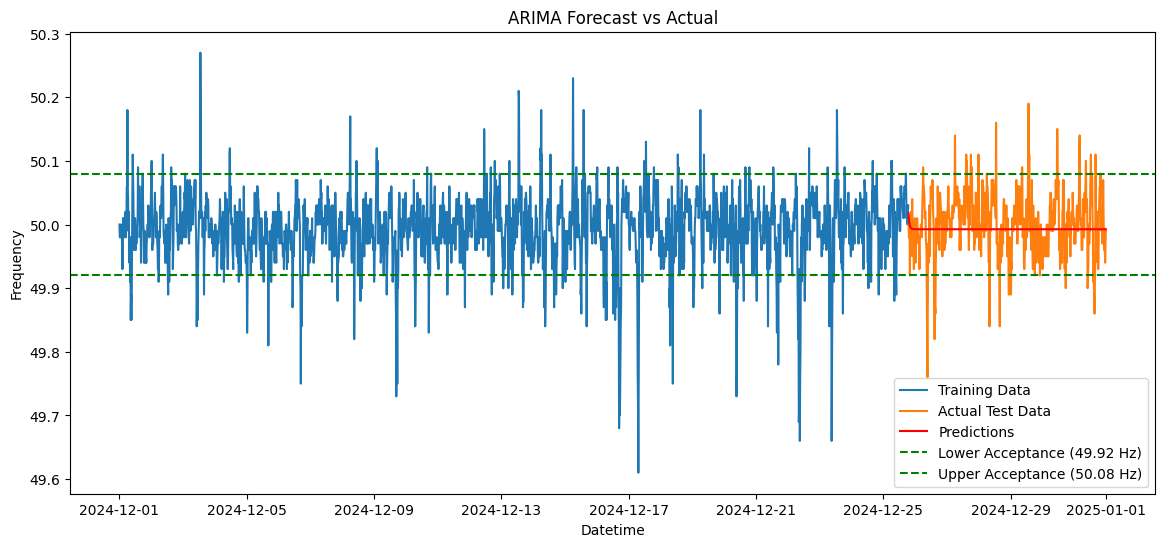

Mean Squared Error: 0.0025578800384062944


In [36]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Frequency_final.csv')

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M')

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model on the training data
model = ARIMA(train['frequency'], order=(1, 0, 1))
model_fit = model.fit()

# Generate predictions for the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels').rename("Predictions")

# Plot predictions and actual values
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['frequency'], label='Training Data')
plt.plot(test.index, test['frequency'], label='Actual Test Data')
plt.plot(predictions.index, predictions, color='red', label='Predictions')
plt.axhline(y=49.92, color='green', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the Mean Squared Error
mse = mean_squared_error(test['frequency'], predictions)
print(f'Mean Squared Error: {mse}')

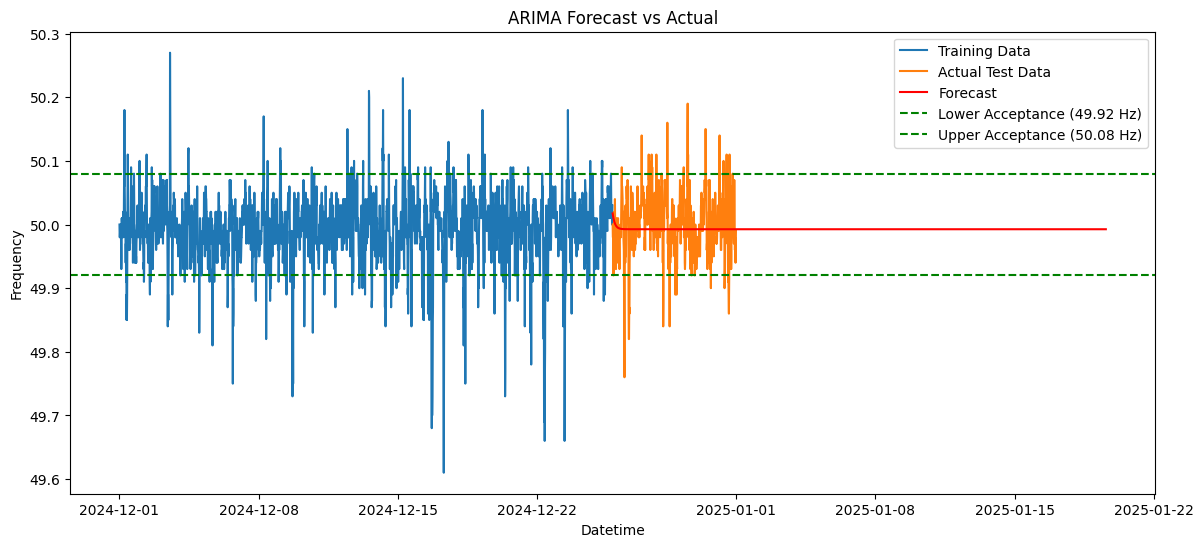

Mean Squared Error: 0.0025578800384062944


In [37]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/Frequency_final.csv')

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M')

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model on the training data
model = ARIMA(train['frequency'], order=(1, 0, 1))
model_fit = model.fit()

# Generate forward-looking forecast for the test set
forecast_steps = len(test)  # Number of steps to forecast (same as test set length)
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted values
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='H')

# Plot historical data, actual test data, and forecast
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['frequency'], label='Training Data')
plt.plot(test.index, test['frequency'], label='Actual Test Data')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.axhline(y=49.92, color='green', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the Mean Squared Error
mse = mean_squared_error(test['frequency'], forecast)
print(f'Mean Squared Error: {mse}')